In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
from main import *
import numpy as np

### The distribution of the points a landlord gets

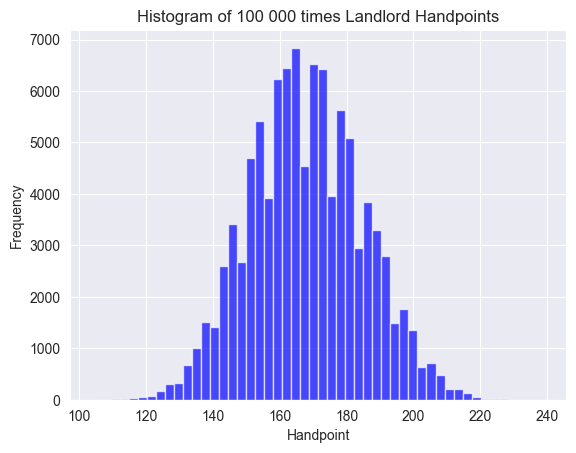

Mean = 167.85284
Standard Deviation = 16.977518780269396


In [2]:
landlord_handpoints = []
for i in range(100000):
    players = [Player() for _ in range(3)]
    set_up_new_game(players)
    for player in players:
        if player.character == LANDLORD:
            landlord_handpoints.append(player.hand_points)
# print(landlord_handpoints)
# Create a histogram
# It should be between 79 and 258
plt.hist(landlord_handpoints, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of 100 000 times Landlord Handpoints')
plt.xlabel('Handpoint')
plt.ylabel('Frequency')

plt.show()

print(f"Mean = {np.mean(landlord_handpoints)}\nStandard Deviation = {np.std(landlord_handpoints)}")

### Landlord Win Rates for different playing strength

In [3]:
with open("DouDiZhu_results.csv", "r", encoding="utf-8") as ddz_csv:
    reader = csv.DictReader(ddz_csv)
    ddz_data = list(reader)

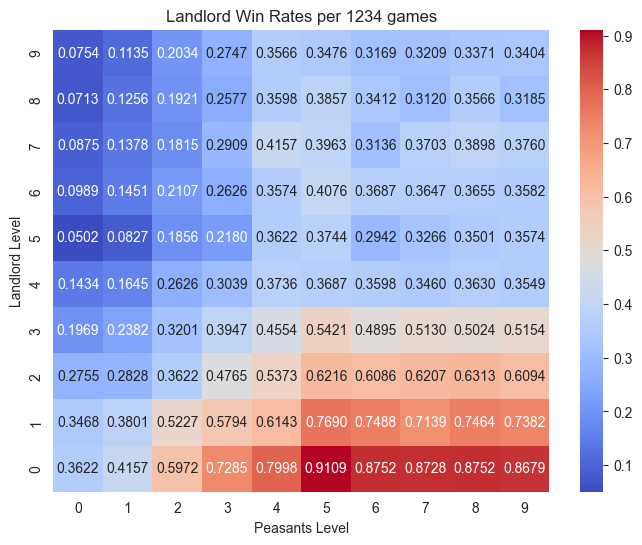

In [4]:
# Create a DataFrame from the data
df = pd.DataFrame(ddz_data)
df['landlord_lv'] = df['landlord_lv'].astype(int)
df['peasants_lv'] = df['peasants_lv'].astype(int)
df['win_rate_l'] = df['win_rate_l'].astype(float)

# Pivot the DataFrame to create a table
table = df.pivot(index='landlord_lv', columns='peasants_lv', values='win_rate_l')

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(table.iloc[::-1], annot=True, cmap='coolwarm', fmt='.4f', cbar=True)

# Set labels and title
plt.xlabel('Peasants Level')
plt.ylabel('Landlord Level')
plt.title('Landlord Win Rates per 1234 games')

# Show the plot
plt.show()


### Landlord Win Rates for different playing strength - Special Rules
We now add 2+1 as available moves

In [5]:
with open("DouDiZhu_special_results.csv", "r", encoding="utf-8") as ddz_csv:
    reader = csv.DictReader(ddz_csv)
    ddz_sp_data = list(reader)

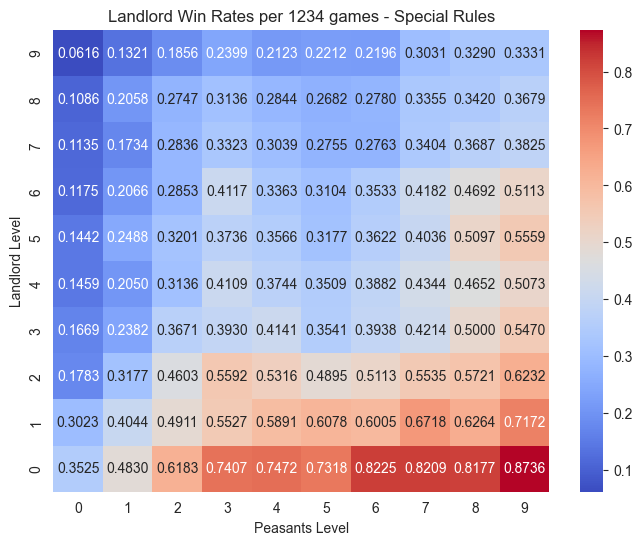

In [6]:
# Create a DataFrame from the data
df = pd.DataFrame(ddz_sp_data)
df['landlord_lv'] = df['landlord_lv'].astype(int)
df['peasants_lv'] = df['peasants_lv'].astype(int)
df['win_rate_l'] = df['win_rate_l'].astype(float)

# Pivot the DataFrame to create a table
table = df.pivot(index='landlord_lv', columns='peasants_lv', values='win_rate_l')

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(table.iloc[::-1], annot=True, cmap='coolwarm', fmt='.4f', cbar=True)

# Set labels and title
plt.xlabel('Peasants Level')
plt.ylabel('Landlord Level')
plt.title('Landlord Win Rates per 1234 games - Special Rules')

# Show the plot
plt.show()